# Graph Sampling

### Why do we need to take a sample from a graph?
- Working with large graphs is impractical.
- Processing time is proportional to the graph size.

### Why don't we use random samling?  

- How to create a smaller graph that is representative of a larger social graph with millions of nodes?
- We need to reduce the size but keep the graph properties of the original graph.
- Important properties normally used to compare graphs are:
    - **Clustering coefficient** 
    - **Node degree distribution**. [3]

### Types of sampling:
1. **Node sampling**: select a set of representative nodes and extract the resulting subgraph among the chosen nodes. Nodes can be sampled: 
    - Proportional to the degree centrality of nodes.
    - According to the PageRank score of the nodes. <br><br>
2. **Edge sampling**: Takes a randomly selected subset of edges by sampling those uniformly. 
    - Randomly select nodes and an edge that belongs to the chosen node. 
    - Hybrid, alternating between node-edge sampling and random edge selection.  <br><br>
3. **Exploration based sampling**: examine the neighborhood of a seed node or a set of seed nodes. 
    - Uses search strategies on the graph to extract a subsample.
    - Such as: breadth first search (BFS), depth first search (DFS) and Snow ball sampling (SB) [1]
    
The first two methods may potentially create a different structure for the network. The next are all exploration based sampling methods. 

### Exploration Based Sampling Example Methods
1. **Snowball Sampling (SB)**: An initial node is selected, all its neighbors, and the neighbors of the neighbors, the selection is like a rolling snowball [2]. A restricted version of BFS where a maximum fixed number of neighbors is traversed.
2. **Forest fire (FF)**: Another version of SB sampling, with different constraints on the maximum number of traversed neighbours. 
3. **Community structure expansion sampling (CSE)**: starting with a seeding node adds new nodes to the sampled set which can reach the largest number of unknown nodes. 
4. **Random node-neighbor(RNN)**: randomly selects a set of seed nodes,takes the neighbors in a single hop and induces the edges of the resulting node set. 
5. Many other exploration based graph sampling strategiesis based on random walks (RW).

and list goes on and on... <br>
**Project/research idea: comparing and exploring sampling approaches..**

### Little Ball of Fur - A Python Graph Sampling Library.

- Includes various sampling techniques.
- Techniques include node, edge and exploration based sampling.

In [60]:
# One time installation
#!pip install littleballoffur

In [61]:
import networkx as nx
from littleballoffur import ForestFireSampler

# we will create a random graph.. (we will cover this type of graphs in Chapter 20
# Parameters
# n : int, The number of nodes
# k : int, Each node is connected to k nearest neighbors in ring topology
# p : float, The probability of rewiring each edge

graph = nx.watts_strogatz_graph(1000, 10, 0) 
sampler = ForestFireSampler()
sampled_graph = sampler.sample(graph)

In [62]:
# number of nodes and edges of the new graph
sampled_graph.order(), sampled_graph.size()

(100, 485)

In [63]:
# Compare transitivity (clustering coefficient)

nx.transitivity(graph), nx.transitivity(sampled_graph)

(0.6666666666666666, 0.6744730679156908)

In [64]:
# compare this to random sampling

import random
k = 100
sampled_nodes = random.sample(graph.nodes, k)
sampled_graph2 = graph.subgraph(sampled_nodes)

In [65]:
nx.transitivity(graph), nx.transitivity(sampled_graph2)

(0.6666666666666666, 0.75)

### To use this library, the NetworkX graph must have the following properties: 

1. The graph is undirected.
2. The graph is connected (it consists of a single strongly connected component).
3. Nodes are indexed with integers, and the node indexing starts with zero and the indices are consecutive.

### Real Dataset - Facebook

In [66]:
social_graph = nx.read_edgelist("facebook_combined.txt") 

In [67]:
# number of nodes and edges
social_graph.order(), social_graph.size()

(4039, 88234)

In [68]:
nx.transitivity(social_graph)

0.5191742775433075

### Sampling Facebook Graph
So, we have to make sure the conditions for using Littleballoffur apply to the graph.

#### 1. The graph is undirected
Yes, since we have read the edge list in undirected graph.

#### 2. The graph is connected

In [69]:
# we should get 1 otherwise, take the giant component only..
nx.number_connected_components(social_graph)

1

#### 3. Nodes are indexed with integers and start from 0

In [70]:
# let's see how hte nodes are represented in Facebook dataset
sorted(social_graph)[:10]

['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005']

The nodes in this dataset are characters, we need to make them integers and label them starting with 0.

In [71]:
mapping = dict(zip(social_graph, range(0, 4039)))
social_graph = nx.relabel_nodes(social_graph, mapping)
sorted(social_graph)[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Now everything is ready for sampling.. <br>

In [72]:
new_social_graph = sampler.sample(social_graph)

In [73]:
# number of nodes and edges of the new graph
new_social_graph.order(), new_social_graph.size()

(100, 1209)

In [74]:
nx.transitivity(social_graph), nx.transitivity(new_social_graph)

(0.5191742775433075, 0.5168346397909668)

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


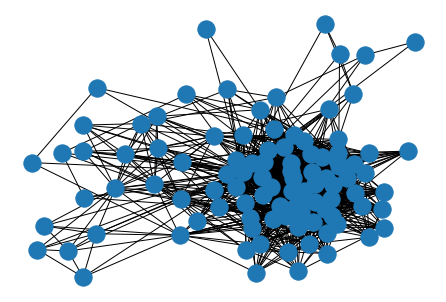

In [75]:
nx.draw(new_social_graph)

Let's try another sampler

In [76]:
from littleballoffur import RandomWalkSampler

In [77]:
new_social_graph2 = sampler.sample(social_graph)

In [78]:
# number of nodes and edges of the new graph
new_social_graph2.order(), new_social_graph2.size()

(100, 814)

In [79]:
nx.transitivity(social_graph), nx.transitivity(new_social_graph2)

(0.5191742775433075, 0.5125888006686168)

# Your Turn

In [80]:
import pandas as pd
df = pd.read_csv('ArxivData.csv')
df.head()

,From,To
0,3466,937
1,3466,5233
2,3466,8579
3,3466,10310
4,3466,15931


In [81]:
G = nx.from_pandas_edgelist(df, 'From', 'To')

### 1. Explain in your own words what did we do in the previous 2 cells..

In [82]:
all_componenets = (G.subgraph(c) for c in nx.connected_components(G))
giant_component = list(all_componenets)[0]

In [83]:
giant_component.order()

4158

### 2. Explain in your own words what did we do in the previous cell..

### 3. Repeat the steps 1 to 3 as we did above, then do the sampling, compare transitivities, and draw the resulting graph.

In [84]:
# 1. Is the graph directed?
# Answer: 

In [85]:
# 2. Is there more than one component?
# Answer:


In [86]:
# 3. Nodes are indexed with integers and start from 0
# Answer:


In [87]:
# Sampling


In [88]:
# Compare trasitivities


In [89]:
# Draw the graph


### 4. Why do think we need to sample graphs?

### 5. Why do we need special algorithms to do that? 

### 6. Why did we take the giant component?

### 7. What is meant by giant component and can we have more than 1 in the graph? Why or why not?

### 8. What is snowball sampling and why do call it snowball?  

References:
1. Benedek Rozemberczki, Oliver Kiss, Rik Sarkar, Little Ball of Fur: A Python Library for Graph Sampling
2. Alberto Boschetti; Luca Massaron, Python Data Science Essentials  
3. Tianyi Wan et ai., Understanding Graph Sampling Algorithms for Social Network Analysis